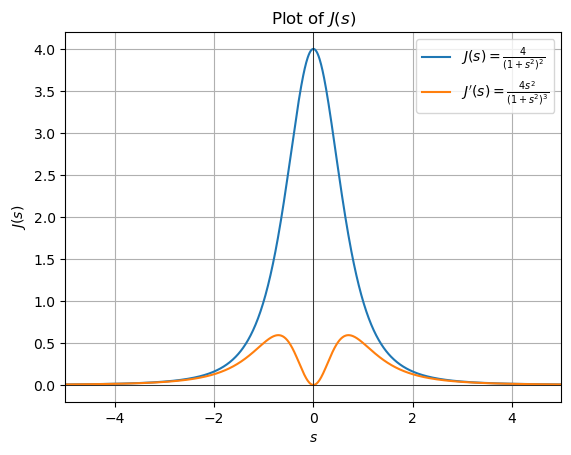

## 1. Bernoulli Neuron: Fisher information and estimator

Assume a Bernoulli neuron with arbitrary tuning curve $f(s)$, i.e.
$$p(r| f(s)) = f(s)^r(1- f(s))^{1-r}, \qquad r \in \{0; 1\}$$

*Note: $r$ is discrete and $s$ is continuous.*

**(a)** Compute the Fisher information $J_s$. *(2 points)*
Consider the score function: 

\begin{align*}
    S_X(s) &= \frac{\partial }{\partial s} \log p(r|f(s)) \\
           &=\frac{\partial }{\partial s} [ r \log(f(s) + (1-r) \log(1 - f(s))]  \\
           &=  r \frac{1}{f}f' + (1-r) \frac{1}{1-f} (-f') \\
           &= f' \left[  \frac{r(1-f) - (1-r)f}{f(1-f)} \right] \\
           &= f' \left[ \frac{r - f}{f(1-f)}\right]  \\
           &= \left[ \frac{r - f(s)}{f(s)(1-f(s)}\right] f'[(s)] 
\end{align*}

\begin{align*}
    J(s) &= \mathbb{E}_r \left[ S_X(s)^2 | s \right] \\ 
         &= \mathbb{E}_r \left[ \frac{(r - f(s))^2}{f^2(s)(1-f(s))^2} (f'[(s)])^2 | s \right]  \text{ (Pulling out terms independent of r )}\\ 
         &=\frac{(f'[(s)])^2 }{f^2(s)(1-f(s))^2} \mathbb{E}_r [(r - f(s))^2 | s] \\ 
\end{align*}

By definition $f(s) = p(r = 1| s)$. and $p(r=0 | s) = 1 - f(s)$ thus 
$E_r[r|s] = f(s)$ thus $\text{Var}_r[r|s] = \mathbb{E}_r[(r - E[r|s])^2 |s] = p(r=1|s) (1 - p(r=1|s)) = f(s)(1 - f(s))$.

Thus we have 
\begin{align*}
    J(s) &= \frac{(f'[(s)])^2 }{f^2(s)(1-f(s))^2} (1 - f(s)) (f(s))  \\ 
        &= \frac{(f'[(s)])^2 }{f(s)(1-f(s))} 
\end{align*}


**(b)** Assume $f(s) = \frac{1}{1+s^2}$. Plot the Fisher information on the interval $s\in[-5, 5]$. Additionally, plot the Fisher information for a Poisson neuron with the same tuning curve using the formula from the lecture. *(2 points)*


*Answer*

\begin{align}
    f'(s) &= \frac{-2s}{(1 + s^2)^2}  \\
    1 - f(s) &= 1 - \frac{1}{1 + s^2} = \frac{s^2}{1 + s^2} \\
    f(s)(1 - f(s) &= \frac{s^2}{(1 + s^2)^2} 
\end{align}

Thus we have:

\begin{align*}
    J(s) &= \frac{4s^2}{(1 + s^2)^4} \frac{(1 + s^2)^2}{s^2} \\ 
         J(s) &= \frac{4}{(1 + s^2)^2}
\end{align*}

In the Poisson neuron model, we have: 

\begin{align}
    J(s) &= \frac{(f'(s))^2}{f} \\ 
         &=  \frac{4s^2}{(1 + s^2)^4} (1 + s^2) \\ 
        &= \frac{4s^2}{( 1+ s^2)^3}
\end{align}


See plotting function below: 




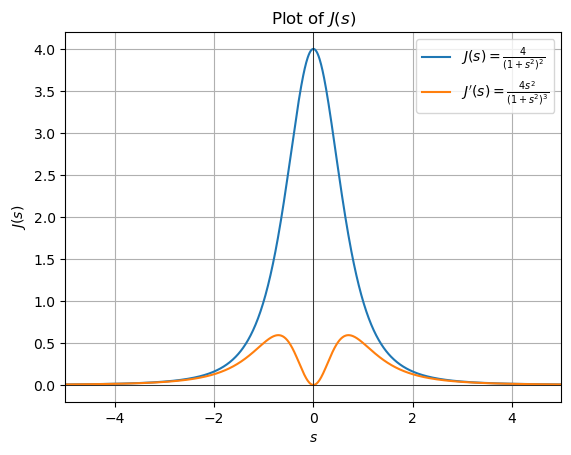

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize


s = np.linspace(-5, 5, 1000)
J = 4 / (1 + s**2)**2
J_p = 4* s**2   / (1 + s**2)**3
plt.plot(s, J, label=r'$J(s) = \frac{4}{(1 + s^2)^2}$')
plt.plot(s, J_p, label=r'$J^{\prime}(s) = \frac{4 s^2}{(1 + s^2)^3}$')
plt.xlim(-5, 5)
#plt.ylim(0, 1)
plt.xlabel(r'$s$')
plt.ylabel(r'$J(s)$')
plt.title(r'Plot of $J(s)$')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid()
plt.legend()   
plt.savefig('J_s.png', dpi=300, bbox_inches='tight')
plt.show()


**(c)** Given an estimator
$\hat s(r) = \begin{cases} 1 & if\qquad r=0\\ 0 &if\qquad r=1\end{cases}$.\
Compute variance $\sigma^2(s)$, bias $b(s)$, and mean squared error $MS(s)$ of this estimator. Don't use the relationship $MS(s) = b^2(s) + \sigma^2(s)$, but instead compute them independently. *(2 points)*


*Confirm for yourself with an automatized tool like wolphramalpha that their relationship is correct.*



We compute the bias of the estimator $\hat s(r)$ using: 

\begin{align}
    b(s) = \text{bias}_s[\hat s(r)] &:= \mathbb{E}_r[\hat{s}(r)|s] - s \\ 
        &= \left[ 1 \times P(r=0 | s) + 0 \times P(r = 1| s) \right]  - s \\ 
        &=  P(r = 0  |s) - s \\ 
        &=  1- f(s) -  s
\end{align}

The variance of the estimator $\hat s(r)$  

\begin{align}
    \sigma^2(s) &= \text{Var}[\hat s(r) | s] \\ 
                &= \mathbb{E}_r[ ( \hat s(r) - \mathbb{E}_r[\hat s(r)|s])^2| s] \\
                &= \mathbb{E}_r[\hat s(r)^2|s]  - \mathbb{E}_r[\hat s(r)|s]^2 \\
                &=   [1^2 \times P(r=0|s)]  - (1 - f(s))^2 \\
                &= 1 - f(s)    - ( f(s)^2 -2 f(s) + 1)  \\
                &= f(s)  - f(s)^2 \\
                &= f(s)  (1 - f(s))
\end{align}


\begin{align}
    \text{MSE(s)} &= \mathbb{E}_r[ (s - \hat s(r) )^2 | s] \\
                  &= \mathbb{E}_r[s^2 -2 \hat{s}(r) s + \hat s(r)^2|s] \\
                  &= s^2 + \mathbb{E}_r[ -2 \hat{s}(r) s + \hat s(r)^2|s] \\
                  &= s^2  + \mathbb{E}_r[-2 \hat{s}(r) s + \hat s(r)^2|s] \\ 
                  &= s^2  - 2s \mathbb{E}_r[\hat{s}(r)|s]  + \mathbb{E}_r[\hat s(r)^2|s] \\ 
                  &= s^2 - 2s (1 - f(s))   + (1 - f(s)) \\
                  &= s^2 - 2s  + 2s f(s))   + 1 - f(s) \\
                  &= s^2 - 2s  + (2s-1) f(s))   + 1 \\
                  &= s^2 - 2s  +1  + (2s-1) f(s))   \\
                  &= (s - 1)^2 + (2s-1) f(s)   \\
\end{align}


**(d)** Assume $s\sim\mathcal{U}([0,1])$. Compute the ideal observer $\hat s_{MS}(r)$. *(2 points)*





*Hint: Compute $p(r=0)$ and $p(r=1)$ with law of total probability. Then use Bayes' theorem to compute $p(s|r)$. Useful integrals:*
\begin{split}
\int \frac1{1+s^2} ds &= \tan^{-1}(s) + c, \qquad c\in\mathbb{R}\\
\int \frac{s}{1+s^2} ds &= \frac12 \ln(1+s^2) + c, \qquad c\in\mathbb{R} \\
\int \frac{s^2}{1+s^2} ds &= s - \tan^{-1}(s) + c, \qquad c\in\mathbb{R} \\
\int \frac{s^3}{1+s^2} ds &= \frac{s^2 - \ln(1+s^2)}{2} + c, \qquad c\in\mathbb{R}
\end{split}



**Answer:**
The ideal observer as per the lecture notes is defined to be the observer 
which minimizes the MSE. 
\begin{align}
    \hat s_{MSE}(r) &= \int s \cdot p(s | r) ds = \mathbb{E}_s[s | r] \\ 
\end{align}

We can define $p(s | r) $ as: 
\begin{align}
    p(s | r = 1) &= \frac{p(r = 1 | s ) p(s)}{p(r=1)} \\
    p(s | r = 0) &= \frac{p(r = 0 | s ) p(s)}{p(r=0)}
\end{align}

Consider 
\begin{align}
    \hat s_{MSE}(r=1) &= \int  s \cdot p(s | r=1) ds \\
                      &= \int s \cdot  \frac{p(r = 1 | s ) p(s)}{p(r=1)}  
 ds \\  
                     &= \frac{1}{p(r=1)} \int s \cdot p(r =1 | s)  \cdot p(s) ds \\ 
                     &= \frac{1}{p(r=1)} \mathbb{E}_s[s \cdot p(r=1|s)] \\ 
                    &= \frac{1}{p(r=1)} \mathbb{E}_s[s f(s)] \\  
\end{align} 

along the same lines we will have: 

\begin{align}
    \hat s_{MSE}(r=0) &= \frac{1}{p(r=0)} \mathbb{E}_s[s (1 - f(s))]
\end{align}

Now using $f(s) = \frac{1}{1 + s^2}$, we evaluate the expectation as: 

\begin{align}
     \mathbb{E}_s[s f(s)] &= \int_0^1  \frac{s}{1 + s^2} p(s) ds \\
\end{align}

as we have $s \sim \mathcal{U}[0,1]$ The density is $p(s) = \frac{1}{1 - 0} = 1$
\begin{align}
     \mathbb{E}_s[s f(s)] &= \int_0^1  \frac{s}{1 + s^2} ds \\
                          &=  \frac{1}{2} \ln(1 + s^2)|_{0}^{1} \\ 
                          &= \frac{1}{2} [\ln(2) - \ln(1)] \\ 
                          &= \frac{1}{2} \ln(2)
\end{align}

Thus we have : 
\begin{align}
    \hat s_{MSE}(r = 1) = \frac{1}{p(r=1)} \frac{1}{2} \ln(2)
\end{align}

Consider
\begin{align}
    p(r=1) &= \int p(r=1 | s) p(s) ds  \\ 
           &= \int_0^1 p(r=1 | s) ds \\ 
           &= \int_0^1 f(s) ds \\ 
           &= \int_0^1 \frac{1}{1 + s^2} ds  \\
           &= \left[ tan^{-1}(s) \right]_{0}^{1} \\
           &= \frac{\pi}{4}
\end{align}

and 
\begin{align}
    p(r = 0) &= \int p(r=0 | s ) p(s) ds \\
            &=  \int_{0}^1 p(r=1 | s) ds \\
            &=  \int_{0}^1 (1  - f(s)) ds \\
            &=  \int_{0}^1 \frac{s^2}{1 + s^2} ds \\
            &=  \int_{0}^1 \frac{s^2}{1 + s^2} ds \\
            &= \left[ s - \tan^{-1}(s)  \right]_{0}^1 \\ 
            &= \left[ s - \tan^{-1}(s)  \right]_{0}^1 \\ 
            &= \left[ 1 - \tan^{-1}(1)  \right]\\ 
            &= \left[ 1 - \frac{\pi}{4} \right]\\ 
\end{align}

Thus we have 
\begin{align}
    \hat s_{MSE}(r = 1) &= \frac{4}{\pi}\frac{1}{2} \ln(2) \\
    &= \frac{2}{\pi} \ln(2)
\end{align} 

and

\begin{align}
    \hat s_{MSE}(r = 0) &= \frac{1}{ 1  -  \frac{\pi}{4}} \int_0^1 \frac{s^3}{1 + s^2} ds \\ 
        &= \frac{4}{4 - \pi} \left[ \frac{s^2 - ln(1 + s^2)}{2} \right]_0^1 \\ 
        &= \frac{4}{4 - \pi} \left[ \frac{1 - \ln(2)}{2} \right] \\ 
        &= \frac{2}{4 - \pi} \left[ 1 - \ln(2) \right]
\end{align}

**(e*)** Contextualize the previous exercises with Cramer-Rao bound. *(2 points)*


## 2: Minimum Discrimination Error (MDE)

Given two stimuli $s_1$ and $s_2$ with probabilities $\lambda$ and $1-\lambda$, the response function is given as

$$p(r|s) = \begin{cases}
\tfrac12 &for & s=0 &and &r\in[-1,1]\\
\tfrac1{2x} &for &s=1 &and &r\in[-x, x]\\
0 &else
\end{cases}$$

**(a)** Draw diagrams for each possible case and highlight the MDE. Additionally, write down the decision for the Maximal a posteriori estimator $\hat{s}_{MAP}(r)$. *(2 points)*\
*Hint: Differentiate the cases by $\lambda$ and $x$. (there are 4 possibilities)*

**(b)** Compute the MDE for each case analytically. *(1 point)*

**(c)** Confirm your results by simulation for multiple sets of parameters $\lambda$ and $x$.
Choose your selection of parameters such that they cover all cases from (a). *(2 points)*
1. Generate stimuli (sufficient amount)
2. Generate responses
3. Apply estimator (write a function of $\hat{s}_{MAP}(r)$ from (a))
4. Compute MDE
5. Compare to analytical MDE